In [424]:
%pylab inline
n=36;m=10;a=1.05
J=169
corr_factor = 1.#1198006/1e7
import numpy as np
import csv
data_root='../../BOSS_DR12_Data/v6alan/'#'../../BOSS DR12 Data/'
data_root2='../../BOSS_DR12_Data/v6gos/'
data_root_old='../../BOSS_DR12_Data/v5alan/'
file_root_jack=data_root+'CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all=data_root+'CovMatricesAll/'#_good/'../GoslingSphere/All/'
file_root_all_2=data_root2+'CovMatricesAll/'
file_root_all_old=data_root_old+'CovMatricesAll/'
rr_true_file =data_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = data_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
counts_file = data_root+'CovMatricesAll/total_counts_n%d_m%d.txt'%(n,m)
total_counts=np.loadtxt(counts_file)

Populating the interactive namespace from numpy and matplotlib


In [396]:
print("%.1e pairs, %.1e triples, %.1e quads attempted"%(total_counts[0],total_counts[1],total_counts[2]))

1.9e+10 pairs, 1.9e+11 triples, 1.9e+12 quads attempted


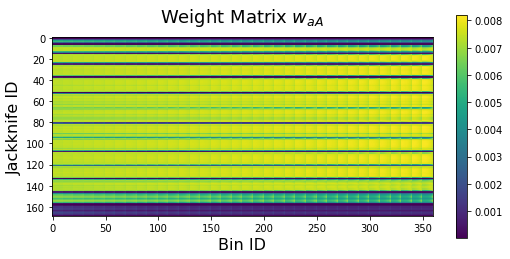

In [397]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.gca().xaxis.tick_bottom()
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title(r'Weight Matrix $w_{aA}$',fontsize=FS+2);

In [398]:
def read_RR_all(n,m,file_root,a,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)*corr_factor**2.
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

In [399]:
def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    cx=np.loadtxt(cxfile)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    cx=(cx+cx.T)/2.
    errc4=(errc4+errc4.T)/2.
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    errc4=(errc4+errc4.T)/2.
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc4,c_tot

In [400]:
c2j,c3j,c4j,cxj,c4jerr,cj_tot=read_cj_all(n,m,file_root_jack,a)
c2,c3,c4,c4err,c_tot=read_c_all(n,m,file_root_all,a)

In [401]:
c22,c32,c42,c4err2,c_tot2=read_c_all(n,m,file_root_all_2,a)

In [425]:
c2o,c3o,c4o,c4erro,c_toto=read_c_all(n,m,file_root_all_old,a)

In [506]:
binct4=np.loadtxt(file_root_all+'binct_c4_n%d_m%d_full.txt'%(n,m))
binct3=np.loadtxt(file_root_all+'binct_c3_n%d_m%d_full.txt'%(n,m))
binct2=np.loadtxt(file_root_all+'binct_c2_n%d_m%d_full.txt'%(n,m))
binct4o=np.loadtxt(file_root_all_old+'binct_c4_n%d_m%d_full.txt'%(n,m))

Text(0.5,1,'Bin Count for Elements of $C_2$ matrix')

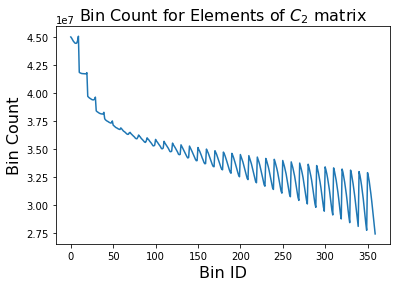

In [427]:
plt.plot(binct2);
plt.ylabel('Bin Count',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Elements of $C_2$ matrix',fontsize=FS)

Text(0.5,1,'Bin Count for Diagonal Elements of $C_3$ matrix')

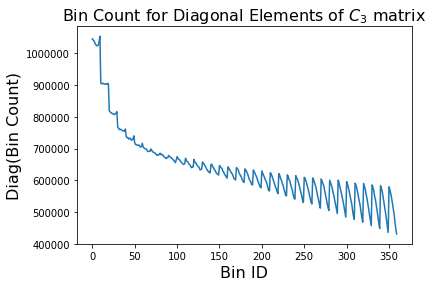

In [428]:
plt.plot(np.diag(binct3));
plt.ylabel('Diag(Bin Count)',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Diagonal Elements of $C_3$ matrix',fontsize=FS)

Text(0.5,1,'Bin Count for Diagonal Elements of $C_4$ matrix')

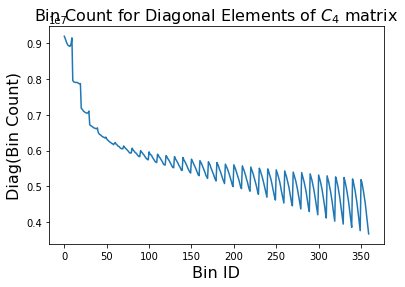

In [508]:
plt.plot(np.diag(binct4));
plt.ylabel('Diag(Bin Count)',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Diagonal Elements of $C_4$ matrix',fontsize=FS)

### Bin Count for $C_{4,ab}$ Matrix 

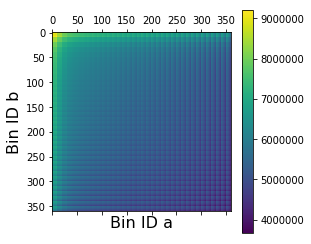

In [430]:
plt.matshow(binct4)
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS)
plt.colorbar()

### Bin Count for $C_{3,ab}$ Matrix 

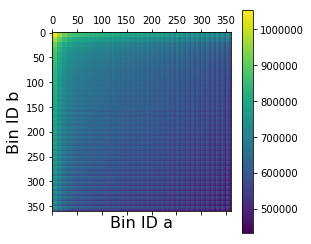

In [431]:
plt.matshow(binct3)
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS)
plt.colorbar()

In [432]:
rr_est,rr_true=read_RR_all(n,m,file_root_all,a)

# Total Matrices

### $C^J_{x,ab}$ plot

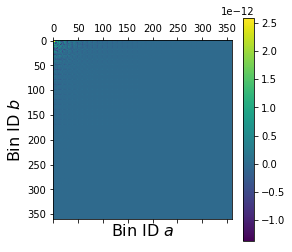

In [433]:
mat=cxj#c4j-cxj+c2j+c3j#_tot#c4j-cxj#_tot#c3ji#_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),100),vmin=np.percentile(mat.ravel(),0))
#plt.xlim([0,40]);plt.ylim([0,40])
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### $C_{\mathrm{tot},ab}$ plot

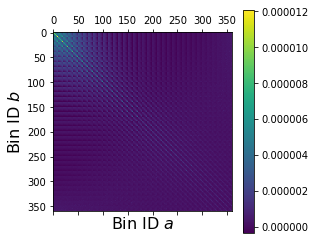

In [434]:
mat=c_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),100.),vmin=np.percentile(mat.ravel(),0.5))
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### Construct Eigenspectrum

**NB: Assume close to symmetric here to get real eigenvalues:**

In [435]:
eigval,eigvec=np.linalg.eigh(c_tot)

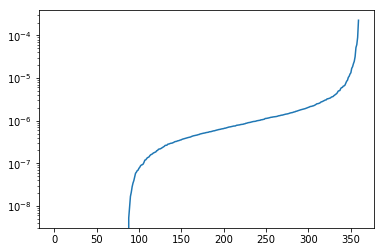

In [512]:
plt.plot(eigval)
plt.yscale('log')

### Compute $C_{ab}r_ar_b$:

In [437]:
r_bins = np.loadtxt('../python/binfile_linear.csv')

In [438]:
white_mat=np.zeros_like(c_tot)
ra_rb = np.zeros_like(c_tot)
for aa in range(len(c_tot)):
    r_a = (r_bins[aa/m][0]+r_bins[aa/m][1])/2.
    for bb in range(len(c_tot)):
        r_b = (r_bins[bb/m][0]+r_bins[bb/m][1])/2.
        ra_rb[aa,bb]=r_a*r_b
white_mat=c_tot*ra_rb

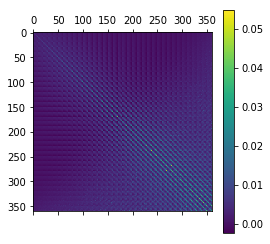

In [439]:
plt.matshow(white_mat,vmax=np.percentile(white_mat,99.99),vmin=np.percentile(white_mat,0.1));
plt.colorbar();

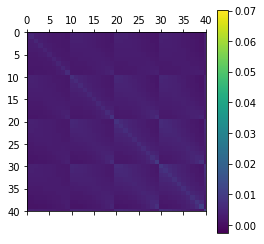

In [440]:
plt.matshow(white_mat)#,vmax=np.percentile(white_mat,99.99999),vmin=np.percentile(white_mat,0.1));
plt.colorbar()
plt.ylim([40,0])
plt.xlim([0,40]);

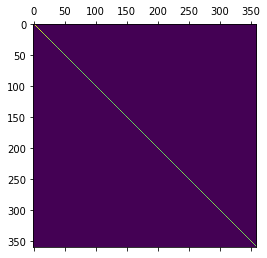

In [417]:
plt.matshow(c2*ra_rb)

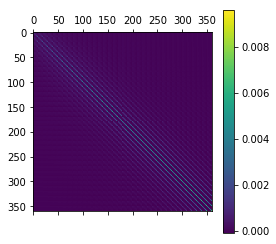

In [441]:
plt.matshow(c3*ra_rb)
plt.colorbar()

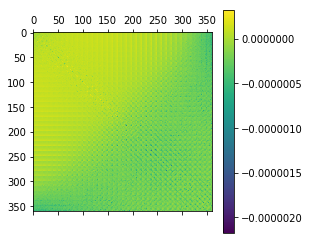

In [503]:
plt.matshow((c4o-c4))
plt.colorbar()

In [504]:
plt.matshow(bin4)

NameError: name 'bin4' is not defined

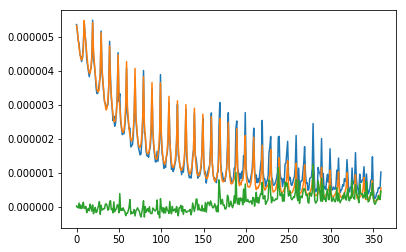

In [498]:
plt.plot(np.diag(c4))
plt.plot(np.diag(c4o))
plt.plot(np.diag(c4-c4o))

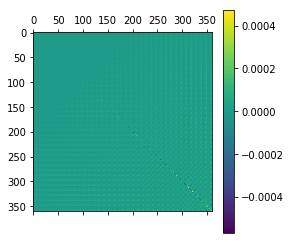

In [470]:
plt.matshow((c3o-c3)*ra_rb);plt.colorbar();

### Compute reduced matrix = correlation matrix $\frac{C_{ab}}{\sqrt{C_{aa}C_{bb}}}$:

In [451]:
red_mat=np.zeros_like(c_tot)
for aa in range(len(c_tot)):
    for bb in range(len(c_tot)):
        red_mat[aa,bb]=c_tot[aa,bb]/np.sqrt(c_tot[aa,aa]*c_tot[bb,bb])

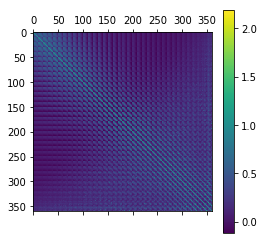

In [452]:
plt.matshow(red_mat)#,vmax=1.1,vmin=-1.1)
plt.colorbar();

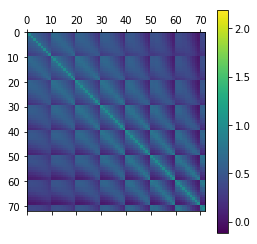

In [453]:
plt.matshow(red_mat)#,vmax=1.1,vmin=-1.1)
plt.colorbar();
plt.ylim([72,0])
plt.xlim([0,72]);

### Inverse of $C_{\mathrm{tot},ab}$

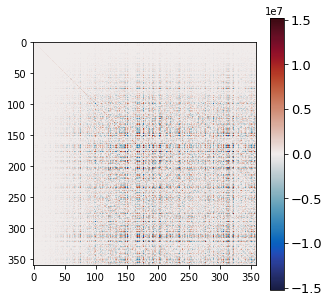

In [456]:
prec=np.linalg.inv(c_tot)
import cmocean
vmax=max(prec.ravel())
fig,ax=plt.subplots(1,figsize=(5,5))
cax=ax.matshow(prec,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)

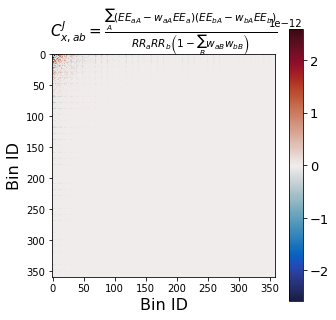

In [367]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

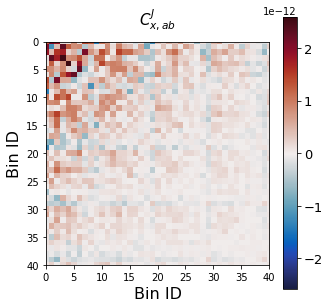

In [368]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
plt.ylim([40,0])
plt.xlim([0,40])
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}$',fontsize=FS-1);

### Precision Matrix

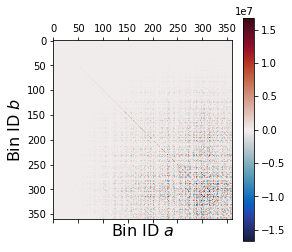

In [369]:
precision=np.linalg.inv(cj_tot)
import cmocean
cmap=cmocean.cm.balance
vmax=np.percentile(precision.ravel(),100.)
plt.matshow(precision,vmax=vmax,vmin=-vmax,cmap=cmap)
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)

plt.colorbar(cmap=cmap)

### Compare 2 estimates for matrix:

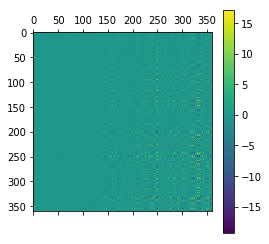

In [370]:
c_gos=c_tot
c_alan=c_tot2
# Compute inverse
inv_alan=np.linalg.inv(c_alan)
diagnostic=np.matmul(c_gos,inv_alan)-np.identity(len(c_gos))
plt.matshow(diagnostic)
plt.colorbar()

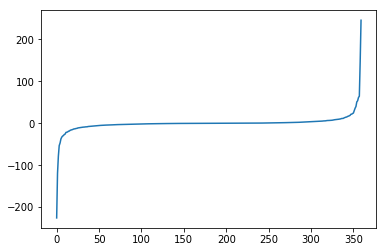

In [371]:
# Compute eigenvalues:
diagnostic_eigenvals=np.linalg.eigvalsh(diagnostic)
plt.plot(diagnostic_eigenvals)

## Compute whitened precision matrix i.e. $\psi_{ab}/{r_ar_b}$

In [372]:
rarb=np.zeros_like(precision)
for aa in range(len(c_tot)):
    r_a = (r_bins[aa/m][0]+r_bins[aa/m][1])/2.
    for bb in range(len(c_tot)):
        r_b = (r_bins[bb/m][0]+r_bins[bb/m][1])/2.
        rarb[aa,bb]=r_a*r_b

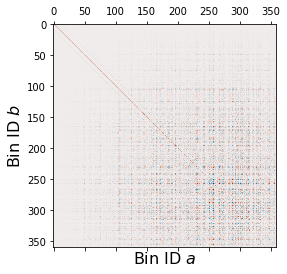

In [373]:
mat=precision/rarb
cmap=cmocean.cm.balance
vmax=np.percentile(mat.ravel(),100.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cmap)
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS);

## Compare two estimates:

In [374]:
# First split into two estimates:
C_est1=np.zeros_like(precision)
C_est2=np.zeros_like(precision)
for i in range(5):
    ctmp=read_c_all(n,m,file_root_all,a,str(i))
    C_est1+=ctmp[-1]
for i in range(5,10):
    ctmp=read_c_all(n,m,file_root_all,a,str(i))
    C_est2+=ctmp[-1]

In [375]:
RRaRRb=np.matmul(np.matrix(rr_true).T,np.matrix(rr_true))

In [376]:
# Now normalize:
C_est1/=(5.*RRaRRb)
C_est2/=(5.*RRaRRb)

In [377]:
C_est1=(C_est1+C_est1.T)/2.
C_est2=(C_est2+C_est2.T)/2.

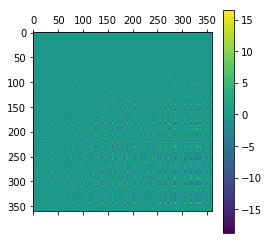

In [378]:
# Now compare estimates:
inv1 = np.linalg.inv(C_est1)
inv2 = np.linalg.inv(C_est2)
id12=np.matmul(inv1,C_est2)
id21=np.matmul(inv2,C_est1)
plt.matshow(id12-np.diag(np.ones(len(id12))));
plt.colorbar()

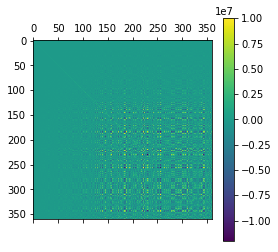

In [379]:
plt.matshow(inv1)
plt.colorbar()

Eigenvalues of id12:

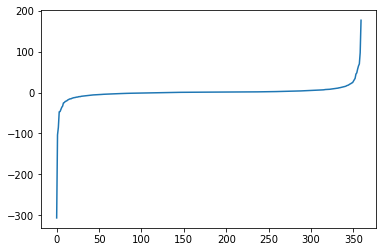

In [380]:
eig12=np.linalg.eigh(id12)[0]
plt.plot(eig12)

## Eigenvalue Convergence

In [381]:
eigs=[];eigscurrent=[]
C_current=np.zeros_like(C_est1)
for i in range(10):
    ctmp=read_c_all(n,m,file_root_all,a,str(i))
    Ctot_i=(ctmp[-1]+ctmp[-1].T)/2.
    C_current=(C_current*i+Ctot_i)/float(i+1)
    eigsi=np.linalg.eigh(Ctot_i)[0]
    eigscurrent.append(np.linalg.eigh(C_current)[0])
    eigs.append(eigsi)

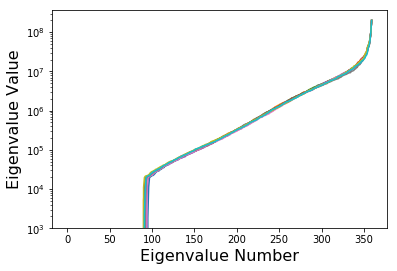

In [382]:
for i in range(len(eigs)):
    plt.plot(eigs[i])
plt.yscale('log')
plt.ylabel('Eigenvalue Value',fontsize=FS)
plt.xlabel('Eigenvalue Number',fontsize=FS);

Text(0.5,0,'Matrix Estimate')

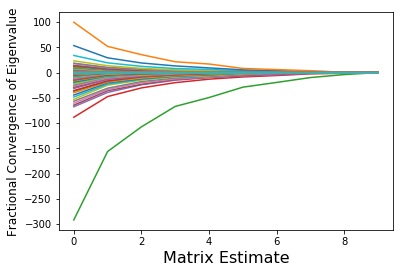

In [383]:
frac_convergence=(eigscurrent-eigscurrent[-1])/(eigscurrent[-1])
for i in range(len(frac_convergence[0])):
    plt.plot(frac_convergence[:,i])
plt.ylabel('Fractional Convergence of Eigenvalue',fontsize=FS-4)
plt.xlabel('Matrix Estimate',fontsize=FS)

## Small Region of $C_4$ matrix

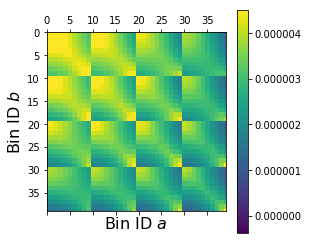

In [384]:
[vmax,vmin]=np.percentile(c4.ravel(),[99.95,0.05])
plt.matshow(c4,vmax=vmax,vmin=vmin)
plt.colorbar()
plt.xlim([0,39]);plt.ylim([39,0]);
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS);


## $C_2$ visualization

In [385]:
R_par=np.zeros(len(c2));
R_per=np.zeros(len(c2));
rbin=np.zeros(len(c2))
thetabin=np.zeros(len(c2))
for i in range(len(c2)):
    rbin[i]=50+i//m*(150.)/n+2.5
    mubin=(i%m)/float(m)+1/(2.*float(m))
    thetabin[i]=np.arccos(mubin)
    R_par[i]=rbin[i]*mubin
    R_per[i]=rbin[i]*np.sqrt(1.-mubin**2.)
RPAR,RPER=np.meshgrid(R_par,R_per)
THE,RR=np.meshgrid(thetabin,rbin)

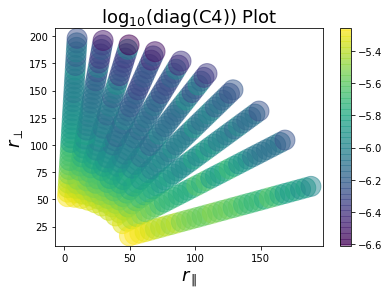

In [386]:
plt.scatter(R_par,R_per,c=np.log10(np.diag(c4)),s=400,alpha=0.5); FS=18
plt.colorbar()
plt.title(r'$\log_{10}(\mathrm{diag}$(C4)) Plot',fontsize=FS);plt.ylabel(r'$r_\perp$',fontsize=FS);plt.xlabel(r'$r_\parallel$',fontsize=FS);FS=16

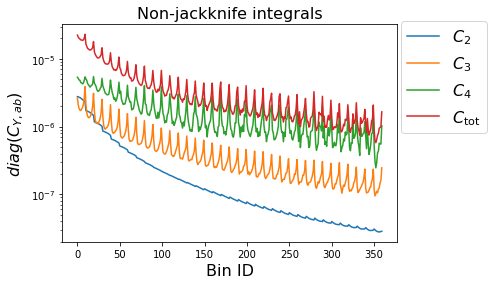

In [387]:
plt.plot(np.diag(c2),label=r'$C_2$')
plt.plot(np.diag(c3),label=r'$C_3$')
plt.plot(np.diag(c4),label=r'$C_4$')
plt.plot(np.diag(a**2.*c2+a*c3+c4),label=r'$C_\mathrm{tot}$')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);
plt.title('Non-jackknife integrals',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));

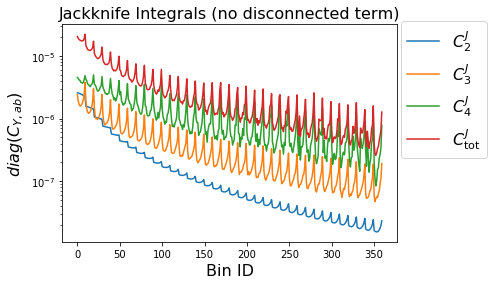

In [388]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
#plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (no disconnected term)',fontsize=FS);
plt.yscale('log');

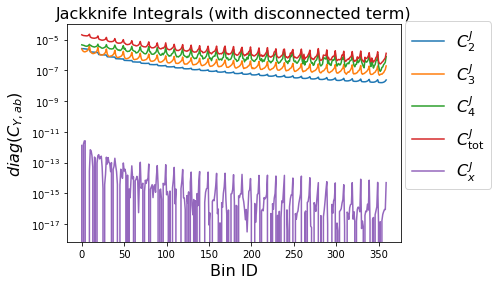

In [389]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (with disconnected term)',fontsize=FS);
plt.yscale('log');

## $RR_a$ Comparison

In [390]:
R1=50.;R2=200.;
vol = np.pi*4./3.*(R2**3.-R1**3.)
N_particles = 1e6
n_density = N_particles/vol

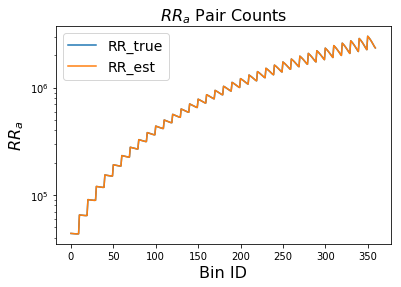

In [391]:
plt.plot(rr_true,label='RR_true')
plt.plot(rr_est,label='RR_est')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$RR_{a}$',fontsize=FS)
plt.legend(fontsize=FS-2);plt.title('$RR_a$ Pair Counts',fontsize=FS);

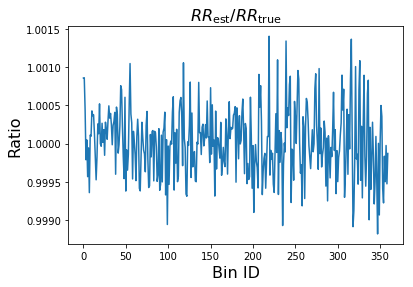

In [392]:
plt.plot((rr_est/rr_true))
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.ylabel('Ratio',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS);

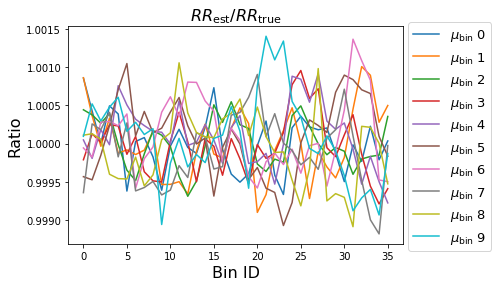

In [393]:
ratio_mu=np.zeros([m,len(rr_true)/m])
for i in range(len(rr_true)):
    ratio_mu[i%m,i/m]=rr_est[i]/rr_true[i]
for i in range(m):
    plt.plot(ratio_mu[i,:],label=r'$\mu_\mathrm{bin}$ %d' %i)
plt.legend(loc=9,bbox_to_anchor=(1.14,1.05),fontsize=FS-3)
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel('Ratio',fontsize=FS);

## Computing KL Divergences

In [394]:
cj_all = c2j+c3j+c4j+cxj
cj_no_c2 = c3j+c4j+cxj
cj_no_cx = c2j+c3j+c4j
cj_no_c3 = c2j+c4j+cxj
cj_no_c4 = c2j+c3j+cxj
precision_all = np.linalg.inv(cj_all)

def KL_div(precision_a,covariance_b):
    """Return negative log likelihood of the KL divergence (in first form)
    i.e. KL = Trace(precision*covariance) - log(det(precision)) - log(det(covariance)) - N_bins"""
    product = np.matmul(precision_a,covariance_b);
    N_bins=len(precision_a)
    logdetPrec = np.linalg.slogdet(precision_a)
    logdetCov = np.linalg.slogdet(covariance_b)
    if logdetPrec[0]!=1.:
        raise Exception('Undefined determinant')
    if logdetCov[0]!=1.:
        raise Exception('Undefined determinant')
    KL = np.matrix.trace(product) - logdetPrec[1] - logdetCov[1] - N_bins
    return KL
    

KL_2 = KL_div(precision_all,cj_no_c2)
KL_3 = KL_div(precision_all,cj_no_c3)
KL_x = KL_div(precision_all,cj_no_cx)

print('Removing C_x^J: %.2f\nRemoving C_2^J: %.2f\nRemoving C_3^J: %.2f'%(KL_x,KL_2,KL_3))

Removing C_x^J: 0.00
Removing C_2^J: 37.52
Removing C_3^J: -1.40
